## 지도학습 중 분류(Classification) 성능 평가 지표
* 성능평가 사용한거에 대한 근거가 있어야됨  --> 도메인 지식 필요

- 정확도(Accuracy)

    - (TN + TP) / (TN + TP + FN +FP) 

- 오차행렬(Confusion Matrix)

- 정밀도(Precision)

    - 스팸 메일
    - 긍정으로 예측한거 중에 잘 맞춘거
    - TP / (TP + FP)
    - Specificity(질병이 없는데 질병이 없다고 판단)
    - 임계값이 높을 수록 정밀도가 높아진다

- 재현율(Recall)---> >TPR

    - 암 환자 진단
    - 실제 긍정중에 잘 맞춘거
    - TP / (FN+TP)
    - Sensitivity(질병이 있는데 질병이 있다고 판단)
    - 임계값이 낮아질 수록 재현율이 높아진다

- F1 Score

    - 정밀도와 재현율의 조화 평균
    - 둘다 적절하게 중요할때
    - 2(정밀도*재현율) / (정밀도 + 재현율) 

- ROC AUC

## sklearn.metrics.precision_score
* sklearn.metrics.precision_score(_y_true_, _y_pred_, _*_, _labels=None_, _pos_label=1_, _average='binary'_, _sample_weight=None_, _zero_division='warn'_)

## sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

## sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

## sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
* F1 = 2 * (precision * recall) / (precision + recall)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix,f1_score

def get_clf_eval(y_test,pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision= precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score= f1_score(y_test,pred)

    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율{recall:.4f}, f1_score{f1score:.4f}')

In [22]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
titanic_df = pd.read_csv('../datasets/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율0.7869, f1_score0.7805


## sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
* Parameters:

    **y_true**ndarray of shape (n_samples,)

    True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.

    **probas_pred**ndarray of shape (n_samples,)

    Target scores, can either be probability estimates of the positive class, or non-thresholded measure of decisions (as returned by  `decision_function`  on some classifiers).

    **pos_label**int or str, default=None

    The label of the positive class. When  `pos_label=None`, if y_true is in {-1, 1} or {0, 1},  `pos_label`  is set to 1, otherwise an error will be raised.

    **sample_weight**array-like of shape (n_samples,), default=None

    Sample weights.

    Returns:

    **precision**ndarray of shape (n_thresholds + 1,)

    Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

    **recall**ndarray of shape (n_thresholds + 1,)

    Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

    **thresholds**ndarray of shape (n_thresholds,)

    Increasing thresholds on the decision function used to compute precision and recall where  `n_thresholds = len(np.unique(probas_pred))`.

In [28]:
lr_pred_proba=lr_clf.predict_proba(X_test)

In [29]:
lr_pred_proba[:,1]

array([0.53839246, 0.12139512, 0.12274835, 0.11715901, 0.14493469,
       0.11769214, 0.11163092, 0.79084209, 0.21742003, 0.63004   ,
       0.10011628, 0.12520285, 0.12275426, 0.11167634, 0.56487118,
       0.14113974, 0.09625906, 0.2668001 , 0.27576913, 0.82742343,
       0.24658022, 0.38036644, 0.14551185, 0.18481931, 0.11204315,
       0.23466044, 0.14030732, 0.07392177, 0.28065899, 0.30511037,
       0.94732947, 0.81778169, 0.1265855 , 0.82555308, 0.39949095,
       0.23466044, 0.07230387, 0.61148234, 0.05300535, 0.10395279,
       0.3501775 , 0.08312397, 0.82212514, 0.70781411, 0.6303146 ,
       0.63033072, 0.91864642, 0.35637593, 0.94891253, 0.11207733,
       0.59432771, 0.11167634, 0.13289252, 0.72478834, 0.30965173,
       0.19657976, 0.2265341 , 0.12274938, 0.154357  , 0.43261738,
       0.28037016, 0.10089159, 0.54667676, 0.51332578, 0.44455622,
       0.09461626, 0.6670339 , 0.59425028, 0.95194541, 0.14774019,
       0.12910725, 0.16863595, 0.10395501, 0.94788236, 0.19870

In [31]:
from sklearn.metrics import precision_recall_curve

data=precision_recall_curve(y_test,lr_pred_proba[:,1])

Text(0, 0.5, 'precision and recall value')

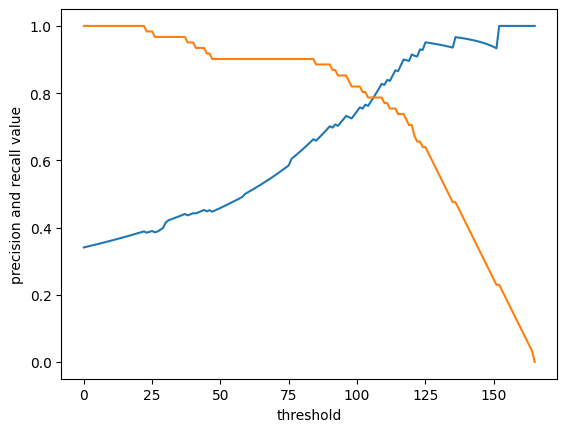

In [36]:
import matplotlib.pyplot as plt

plt.plot(data[0])
plt.plot(data[1])
plt.xlabel('threshold')
plt.ylabel('precision and recall value')



## sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
* Parameters:
    y_true : ndarray of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.

    y_score : ndarray of shape (n_samples,)
    Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
* Returns:
    fpr : ndarray of shape (>2,)
    

    tpr : ndarray of shape (>2,)
  

    thresholds : ndarray of shape = (n_thresholds,)
 

## sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
* Parameters:
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases expect labels with shape (n_samples,) while the multilabel case expects binary label indicators with shape (n_samples, n_classes).

    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

* Returns:
    aucfloat
    Area Under the Curve score.

In [44]:
from sklearn.metrics import roc_curve

pred_proba_class1= lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds =roc_curve(y_test,pred_proba_class1)

thr_index =np.arange(1,thresholds.shape[0], 5)
print("샘플 추출을 위한 임곗값 배열의 index:", thr_index)
print("샘플 index로 추출한 임곗값: ",np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR:  [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


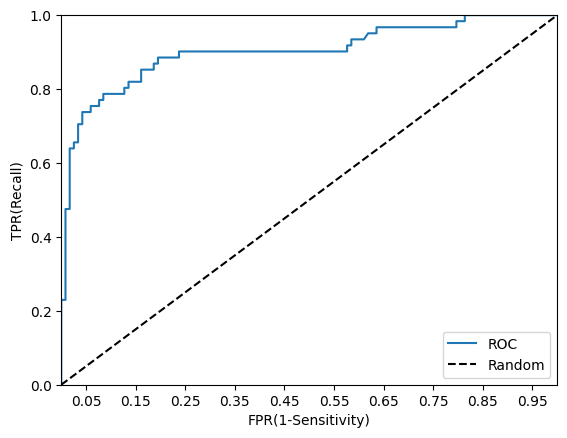

In [47]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따를 fpr,tpr,tpr 값을 반환 받음
    fprs,tprs,thresholds =roc_curve(y_test,pred_proba_class1)

    # Roc Curve를 plot곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    # 가운데 대각선 직석ㄴ을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')

    #FPR X축의 Scale을 0,1 단위로 변경,X,Y 축명 설정등
    start,end =plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()


roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [51]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print(f'Roc Auc 값:{roc_score:.4f}')

Roc Auc 값:0.9024
